# import module

In [2]:
import easyocr
from matplotlib import pyplot as plt
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image

#from imutils.perspective import four_point_transform
#from imutils.contours import sort_contours
#import imutils

# set variable

In [3]:
imgPath = 'testImg7.jpg'

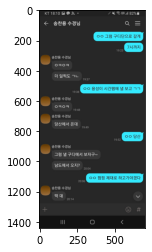

In [4]:
img = cv2.imread(imgPath)
plt.imshow(img)

In [5]:
img = cv2.imread(imgPath)
print("img.shape = {0}".format(img.shape))



#resize_img = cv2.resize(img, (700, 1400))
#print("resize_img.shape = {0}".format(resize_img.shape))
#plt.imshow(resize_img)

img.shape = (1440, 701, 3)


# square box

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
c:\Users\dhdyd\Anaconda3\envs\ocr\lib\site-packages\torchvision\models\_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
c:\Users\dhdyd\Anaconda3\envs\ocr\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\dhdyd\Anaconda3\envs\ocr\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


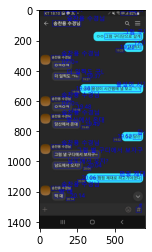

In [8]:
reader = easyocr.Reader(['ko', 'en'])
result =  reader.readtext(imgPath)

img = cv2.imread(imgPath)

imgarr = Image.fromarray(img)
font = ImageFont.truetype("malgun.ttf", 40)
draw = ImageDraw.Draw(imgarr)

for i in result:
  x = i[0][0][0]
  y = i[0][0][1]
  w = i[0][1][0] - i[0][0][0]
  h = i[0][2][1] - i[0][1][1]

  draw.rectangle(((x, y), (x+w, y+h)), outline="blue", width=2)
  draw.text((int((x+x+w)/2), y-40), str(i[1]), font=font, fill="blue")

plt.imshow(imgarr)
plt.show()

# extract text

In [22]:
reader = easyocr.Reader(['ko'])
result = reader.readtext(imgPath)
#print(result)
#for i in range(len(result)):
#    print(result[i][1])


l= []
name = None
s = ""
flag = False

for i in range(len(result)):
    if flag == False and result[i][0][0][0]/img.shape[1] > 80/700 and result[i][0][0][0]/img.shape[1] < 100/700 and result[i][0][0][1]/img.shape[0] > 60/1500 and result[i][0][0][1]/img.shape[0] < 80 / 1500 :
        name = result[i][1]
        flag = True
        continue
    elif name ==  result[i][1]:
        l = result[i:]
        break
for i in range(len(l)) :
    s +=  l[i][1]


print(name)
print(s)




CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


승찬용 수경님
승찬용 수경님0키0=더 일찍도 구스19.37용성이 시간덩에 벌 보고 7719.38승찬용 수경님0키0=19.48승찬용 수경님당산에서 온대19.49당산19.52승찬용 수경님그럼 벌 구디에서 보자구 ~남도에서 오지?20.04편굉 제대로 하고가야켓다20.06승찬용 수경님딱 대20.14#
